In [ ]:
!pip install -qq ultralytics
import numpy
!pip install -Uqq Pillow
#!pip install numpy == 1.12.4
print(numpy.__version__)


1.24.4


In [ ]:
#!pip uninstall -y numpy
#!pip install numpy==1.24.4
#!pip install --upgrade --no-deps ultralytics

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompati

ERROR: Operation cancelled by user
^C


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from torchvision.ops import box_iou


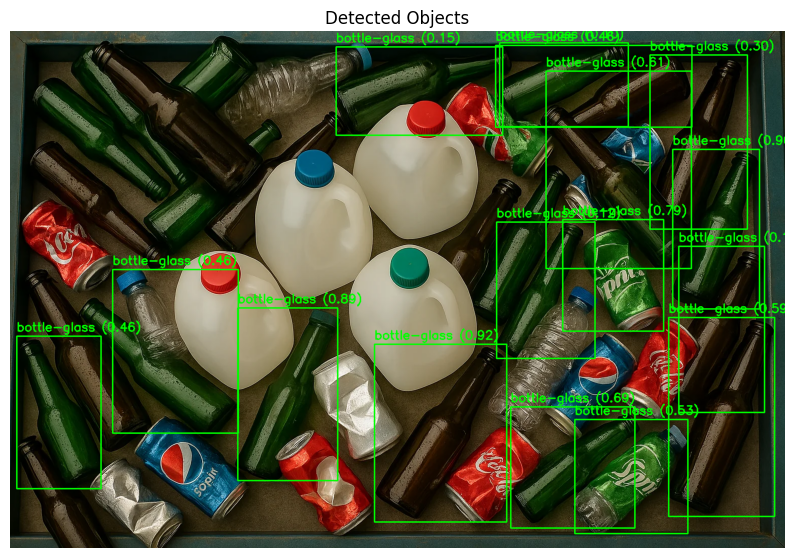

Number of objects detected per class:
  bottle-glass: 16


In [ ]:
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
class_names = ["ALUCAN", "HDPEM", "PET", "bottle-glass", "nc"]
pruned_model_path = "/content/drive/MyDrive/ENDG 511 Project/model5250.pt"
pruned_model = YOLO(pruned_model_path)

img_path = "/content/drive/MyDrive/ENDG 511 Project/assets2Ftask_01jr9avejwfyt9knxe9p0654qd2Fimg_2.png"

results = pruned_model.predict(source=img_path, conf=0.1, save=False, verbose=False)

#Store prediction values
boxes = results[0].boxes.xyxy.cpu().numpy()
scores = results[0].boxes.conf.cpu().numpy()
class_ids = results[0].boxes.cls.cpu().numpy()

image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Class counteer
class_counts = defaultdict(int)

#Loop through all predictions and draw boxes for each
for i in range(len(boxes)):
    x1, y1, x2, y2 = boxes[i]
    confidence = scores[i]
    class_id = int(class_ids[i])
    class_label = class_names[class_id] if class_id in range(len(class_names)) else f"Class {class_id}"

    # Count the class
    class_counts[class_label] += 1

    # Draw bounding boxes
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image, f"{class_label} ({confidence:.2f})", (int(x1), int(y1)-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.title("Detected Objects")
plt.show()


print("Number of objects detected per class:")
for cls, count in class_counts.items():
    print(f"  {cls}: {count}")

In [ ]:
# Attempts to get the Model sizes and compare between original and pruned model
import os

path_original = "/content/drive/MyDrive/ENDG 511 Project/model5250.pt"
path_pruned = "/content/drive/MyDrive/ENDG 511 Project/pruned_model15.pt"

size_original = os.path.getsize(path_original) / 1e6  # MB
size_pruned = os.path.getsize(path_pruned) / 1e6

print(f"Original model size: {size_original:.2f} MB")
print(f"Pruned model size:   {size_pruned:.2f} MB")

Original model size: 22.52 MB
Pruned model size:   22.53 MB


In [ ]:
#Attempts to get the number of parameters
from ultralytics import YOLO

model_orig = YOLO(path_original).model
model_pruned = YOLO(path_pruned).model

def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Original Params:", count_params(model_orig))
print("Pruned Params:  ", count_params(model_pruned))


Original Params: 0
Pruned Params:   0


In [ ]:
#Attempts to get the number of parameters
def count_params(yolo_model):
    return sum(p.numel() for p in yolo_model.model.parameters() if p.requires_grad)


model_orig = YOLO(path_original)
model_pruned = YOLO(path_pruned)

print(f"Original params: {count_params(model_orig):,}")
print(f"Pruned params:   {count_params(model_pruned):,}")

Original params: 0
Pruned params:   0


In [ ]:
# Runs .Val() on both pruned and unpruned modles displaying various results and printing the MAP50 scores
metrics_orig = YOLO(path_original).val(data="/content/drive/MyDrive/ENDG 511/cleaned4/cleaned.yaml")
metrics_pruned = YOLO(path_pruned).val(data="/content/drive/MyDrive/ENDG 511/cleaned4/cleaned.yaml")
print(f"Original mAP@0.5: {metrics_orig.box.map50:.3f}")
print(f"Pruned mAP@0.5:   {metrics_pruned.box.map50:.3f}")


Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/ENDG 511/cleaned4/val/labels.cache... 4437 images, 0 backgrounds, 11 corrupt: 100%|██████████| 4437/4437 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/ENDG 511/cleaned4/val/images/AluCan39.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0469]
val: WARNING ⚠️ /content/drive/MyDrive/ENDG 511/cleaned4/val/images/AluCan48.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.002]
val: WARNING ⚠️ /content/drive/MyDrive/ENDG 511/cleaned4/val/images/AluCan55.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.013]
val: WARNING ⚠️ /content/drive/MyDrive/ENDG 511/cleaned4/val/images/AluCan87.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0339]
val: WARNING ⚠️ /content/drive/MyDrive/ENDG 511/cleaned4/val/images/Glass385.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0052]
val: WARNING ⚠️ /content/drive/MyDrive/ENDG 511/cleaned4/val/images/Glass435.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordi


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 277/277 [1:00:07<00:00, 13.02s/it]


                   all       4426       4658      0.996      0.996      0.995      0.917
                ALUCAN        985       1027      0.996       0.99      0.995      0.862
                 HDPEM        953        954      0.999      0.999      0.995      0.925
                   PET       1391       1391      0.999      0.997      0.995      0.945
          bottle-glass       1124       1286      0.992      0.996      0.994      0.935
Speed: 7.6ms preprocess, 776.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val2
Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/ENDG 511/cleaned4/val/labels.cache... 4437 images, 0 backgrounds, 11 corrupt: 100%|██████████| 4437/4437 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/ENDG 511/cleaned4/val/images/AluCan39.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0469]
val: WARNING ⚠️ /content/drive/MyDrive/ENDG 511/cleaned4/val/images/AluCan48.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.002]
val: WARNING ⚠️ /content/drive/MyDrive/ENDG 511/cleaned4/val/images/AluCan55.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.013]
val: WARNING ⚠️ /content/drive/MyDrive/ENDG 511/cleaned4/val/images/AluCan87.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0339]
val: WARNING ⚠️ /content/drive/MyDrive/ENDG 511/cleaned4/val/images/Glass385.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0052]
val: WARNING ⚠️ /content/drive/MyDrive/ENDG 511/cleaned4/val/images/Glass435.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordi


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 277/277 [59:43<00:00, 12.94s/it]


                   all       4426       4658          1          1      0.995      0.937
                ALUCAN        985       1027          1          1      0.995      0.898
                 HDPEM        953        954          1      0.999      0.995      0.931
                   PET       1391       1391          1          1      0.995       0.96
          bottle-glass       1124       1286          1          1      0.995      0.957
Speed: 4.7ms preprocess, 764.0ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val3
Original mAP@0.5: 0.995
Pruned mAP@0.5:   0.995
